<a href="https://colab.research.google.com/github/leobezlel/excelr-assignments/blob/main/Assignment_18_(NLP_and_Naive_Bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
stop_words = stopwords.words()

In [ ]:
# Read the file
df = pd.read_csv('blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [ ]:
df.describe().T

,count,unique,top,freq
Data,2000,2000,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,1
Labels,2000,20,alt.atheism,100


In [ ]:
# EDA and Data Preprocessing

# Category count:
df['Labels'].value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
talk.politics.misc,100
talk.politics.mideast,100
talk.politics.guns,100
soc.religion.christian,100
sci.space,100
sci.med,100
sci.electronics,100


<Axes: >

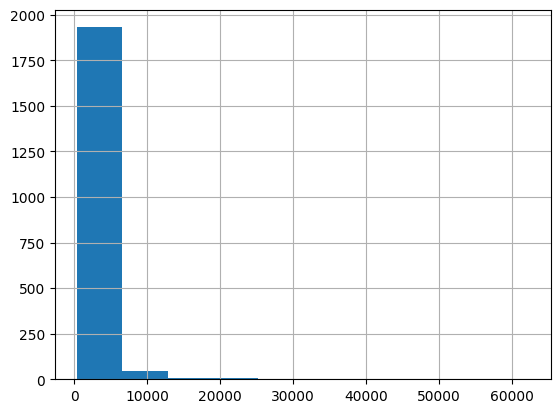

In [ ]:
# the number of characters present in each sentence
df['Data'].str.len().hist()

In [ ]:
# Text cleaning

def cleaning(text):
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number
    text = re.sub('<.*?>+', '', text) # removing special characters,
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    #removing emoji:
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

   # removing short form:

    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)


    return text

dt = df['Data'].apply(cleaning)

In [ ]:
dt = pd.DataFrame(dt)
dt['Labels'] = df['Labels']
dt

,Data,Labels
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
1,newsgroups altatheismpath cantaloupesrvcscmued...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
4,xref cantaloupesrvcscmuedu altatheism talkreli...,alt.atheism
...,...,...
1995,xref cantaloupesrvcscmuedu talkabortion altath...,talk.religion.misc
1996,xref cantaloupesrvcscmuedu talkreligionmisc ta...,talk.religion.misc
1997,xref cantaloupesrvcscmuedu talkorigins talkrel...,talk.religion.misc
1998,xref cantaloupesrvcscmuedu talkreligionmisc al...,talk.religion.misc


In [ ]:
# remove stop word:
dt['no_sw'] = dt['Data'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
dt

,Data,Labels,no_sw
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,newsgroups altatheismpath cantaloupesrvcscmued...,alt.atheism,newsgroups altatheismpath cantaloupesrvcscmued...
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,xref cantaloupesrvcscmuedu altatheism talkreli...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...
...,...,...,...
1995,xref cantaloupesrvcscmuedu talkabortion altath...,talk.religion.misc,xref cantaloupesrvcscmuedu talkabortion altath...
1996,xref cantaloupesrvcscmuedu talkreligionmisc ta...,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc ta...
1997,xref cantaloupesrvcscmuedu talkorigins talkrel...,talk.religion.misc,xref cantaloupesrvcscmuedu talkorigins talkrel...
1998,xref cantaloupesrvcscmuedu talkreligionmisc al...,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc al...


In [ ]:
#Working with the most Frequent Words:
from collections import Counter

cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,apr,1945
1,article,1279
2,date,1199
3,university,847
4,newsgroups,818
5,path,770
6,gmtlines,728
7,sender,725
8,writes,699
9,time,629


In [ ]:
import plotly.express as px

px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h',
             width=700, height=700)

In [ ]:
# Remove the most frequent words:

FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))
dt.head()

,Data,Labels,no_sw,wo_stopfreq
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...
1,newsgroups altatheismpath cantaloupesrvcscmued...,alt.atheism,newsgroups altatheismpath cantaloupesrvcscmued...,altatheismpath cantaloupesrvcscmueducrabapples...
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,cantaloupesrvcscmuedudasnewsharvardedunocnearn...
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...
4,xref cantaloupesrvcscmuedu altatheism talkreli...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...,xref cantaloupesrvcscmuedu altatheism talkreli...


In [ ]:
dt['no_sw'].loc[5]

'xref cantaloupesrvcscmuedu talkabortion altatheism talkreligionmiscpath cantaloupesrvcscmuedudasnewsharvardedunocnearnetuunetgatekeeperusoraclecombarrnetnetkyleeitechcomkyleeitechcomnotformailfrom ekrsquickeitechcom eric rescorlanewsgroups talkabortionaltatheismtalkreligionmiscsubject years christian morality isdate apr organization eitlines messageid references nntppostinghost squickeitechcomin article frankd012s658uucp frank odwyer writesin article ekrkyleeitechcom eric rescorla writesin article frankd012s658uucp frank odwyer writesin article sandviksandvikkentapplecom sandviknewtonapplecom kent sandvik writesyou pushed defintion objectivity realm ofobjective values explain wellas objective subparts objective atoms quarksfirstly science basis values roundyou means itmeansperhaps explain science basisin values means reason science thatthey value results science hasits basis values stops working stopvaluing privacyits partly reason science value itsresultsright relativism letter theor

In [ ]:
dt['wo_stopfreq'].loc[5]

'xref cantaloupesrvcscmuedu talkabortion altatheism talkreligionmiscpath cantaloupesrvcscmuedudasnewsharvardedunocnearnetuunetgatekeeperusoraclecombarrnetnetkyleeitechcomkyleeitechcomnotformailfrom ekrsquickeitechcom eric rescorlanewsgroups talkabortionaltatheismtalkreligionmiscsubject years christian morality isdate organization eitlines messageid references nntppostinghost squickeitechcomin frankd012s658uucp frank odwyer writesin ekrkyleeitechcom eric rescorla writesin frankd012s658uucp frank odwyer writesin sandviksandvikkentapplecom sandviknewtonapplecom kent sandvik writesyou pushed defintion objectivity realm ofobjective values explain wellas objective subparts objective atoms quarksfirstly science basis values roundyou means itmeansperhaps explain science basisin values means reason science thatthey value results science hasits basis values stops working stopvaluing privacyits partly reason science value itsresultsright relativism letter theoriesand predictions results science s

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words.
# It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.


wordnet_lem = WordNetLemmatizer()

dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)
dt

,Data,Labels,no_sw,wo_stopfreq,wo_stopfreq_lem
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...
1,newsgroups altatheismpath cantaloupesrvcscmued...,alt.atheism,newsgroups altatheismpath cantaloupesrvcscmued...,altatheismpath cantaloupesrvcscmueducrabapples...,altatheismpath cantaloupesrvcscmueducrabapples...
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,cantaloupesrvcscmuedudasnewsharvardedunocnearn...,cantaloupesrvcscmuedudasnewsharvardedunocnearn...
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...
4,xref cantaloupesrvcscmuedu altatheism talkreli...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...,xref cantaloupesrvcscmuedu altatheism talkreli...,xref cantaloupesrvcscmuedu altatheism talkreli...
...,...,...,...,...,...
1995,xref cantaloupesrvcscmuedu talkabortion altath...,talk.religion.misc,xref cantaloupesrvcscmuedu talkabortion altath...,xref cantaloupesrvcscmuedu talkabortion altath...,xref cantaloupesrvcscmuedu talkabortion altath...
1996,xref cantaloupesrvcscmuedu talkreligionmisc ta...,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc ta...,xref cantaloupesrvcscmuedu talkreligionmisc ta...,xref cantaloupesrvcscmuedu talkreligionmisc ta...
1997,xref cantaloupesrvcscmuedu talkorigins talkrel...,talk.religion.misc,xref cantaloupesrvcscmuedu talkorigins talkrel...,xref cantaloupesrvcscmuedu talkorigins talkrel...,xref cantaloupesrvcscmuedu talkorigins talkrel...
1998,xref cantaloupesrvcscmuedu talkreligionmisc al...,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc al...,xref cantaloupesrvcscmuedu talkreligionmisc al...,xref cantaloupesrvcscmuedu talkreligionmisc al...


In [ ]:
# Tokenization

# create the cleaned data for the train-test split:

nb = dt.drop(columns=['Data','no_sw', 'wo_stopfreq'])
nb.columns = ['Labels','review']
#nb.sentiment = [0 if each == "negative" else 1 for each in nb.sentiment]
nb

,Labels,review
0,alt.atheism,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...
1,alt.atheism,altatheismpath cantaloupesrvcscmueducrabapples...
2,alt.atheism,cantaloupesrvcscmuedudasnewsharvardedunocnearn...
3,alt.atheism,cantaloupesrvcscmuedumagnesiumclubcccmuedunews...
4,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...
...,...,...
1995,talk.religion.misc,xref cantaloupesrvcscmuedu talkabortion altath...
1996,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc ta...
1997,talk.religion.misc,xref cantaloupesrvcscmuedu talkorigins talkrel...
1998,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc al...


In [ ]:
tokenized_review = nb['review'].apply(lambda x: x.split())
tokenized_review.head(5)

,review
0,[cantaloupesrvcscmuedumagnesiumclubcccmuedunew...
1,"[altatheismpath, cantaloupesrvcscmueducrabappl..."
2,[cantaloupesrvcscmuedudasnewsharvardedunocnear...
3,[cantaloupesrvcscmuedumagnesiumclubcccmuedunew...
4,"[xref, cantaloupesrvcscmuedu, altatheism, talk..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['review'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
# Train-test split

from sklearn.model_selection import train_test_split

X=text_counts
y=nb['Labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

In [ ]:
# Complement Naive Bayes Model

from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix

CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics

predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 87.25%
------------------------------------------------
Confusion Matrix:
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0   11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   
1    0  19   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2    0   1  13   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3    0   0   1  18   1   0   0   0   0   0   0   0   1   0   0   0   0   0   
4    0   0   0   0  17   0   0   0   0   0   0   0   0   0   0   0   0   0   
5    0   0   0   0   0  14   0   0   0   0   0   0   0   0   0   0   0   0   
6    0   1   1   1   1   0  20   1   0   0   0   0   0   0   0   0   0   0   
7    0   0   0   0   0   0   0   9   0   0   0   0   0   0   0   0   0   0   
8    0   0   0   0   0   0   0   0  21   0   0   0   0   0   0   0   0   0   
9    0   0   0   0   0   0   0   0   0  18   1   0   0   0   0   0   0   0   
10   0   0   0   0   0   0   0   0   

In [ ]:
# Multinominal Naive Bayes Model

from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 75.00%
------------------------------------------------
Confusion Matrix:
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0   10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   1   
1    1  18   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2    0   2  12   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3    0   4   3  11   0   0   0   1   0   0   0   1   1   0   0   0   0   0   
4    0   5   1   1  11   0   0   0   0   0   0   0   0   0   0   0   0   0   
5    0   4   0   0   0  10   0   0   0   0   0   0   0   0   0   0   0   0   
6    0   4   2   2   1   0  14   1   1   0   0   0   0   0   0   0   0   0   
7    0   0   0   0   1   0   0   7   0   0   0   0   0   0   0   0   0   1   
8    0   0   0   0   0   0   0   1  18   0   0   0   0   1   0   0   0   1   
9    0   1   0   0   0   0   0   0   0  17   1   0   0   0   0   0   0   0   
10   0   0   0   0   0   0   0   0 

In [ ]:
# Bernoulli Naive Bayes Model

from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 7.50%
------------------------------------------------
Confusion Matrix:
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    6   0   0   0   0   0   0   7   0   0   0   0   0   0   0   0   0   1   
1    0   0   0   0   0   0   0  20   0   0   0   0   0   0   0   0   0   0   
2    0   0   0   0   0   2   0  14   0   0   0   0   0   0   0   0   0   0   
3    0   0   0   0   0   0   0  21   0   0   0   0   0   0   0   0   0   0   
4    0   0   0   0   0   0   0  19   0   0   0   0   0   0   0   0   0   0   
5    0   0   0   0   0   2   0  12   0   0   0   0   0   0   0   0   0   0   
6    0   0   0   0   0   0   0  25   0   0   0   0   0   0   0   0   0   0   
7    0   0   0   0   0   0   0   9   0   0   0   0   0   0   0   0   0   0   
8    0   0   0   0   0   0   0  21   0   0   0   0   0   0   0   0   0   0   
9    0   0   0   0   0   0   0  19   0   0   0   0   0   0   0   0   0   0   
10   0   0   0   0   0   0   0  18   0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



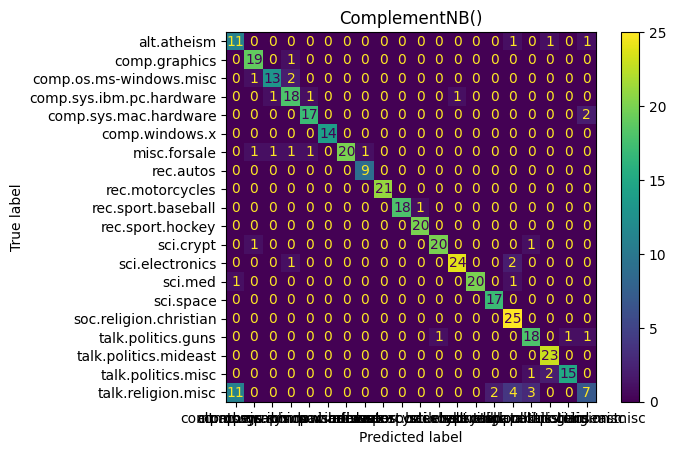

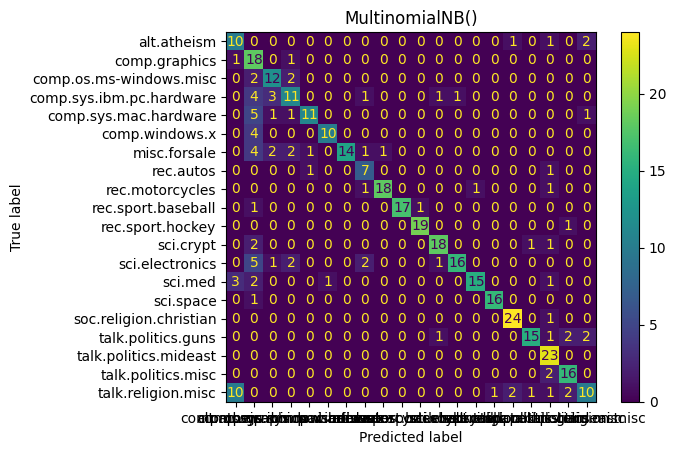

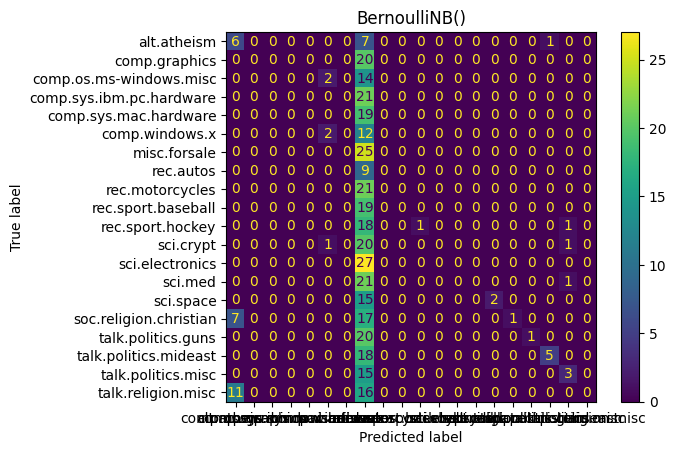

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

k= [CNB, MNB, BNB]
for i in k:
    # use ConfusionMatrixDisplay.from_estimator instead of plot_confusion_matrix
    ConfusionMatrixDisplay.from_estimator(i, X_test, y_test)
    plt.title(i)
    plt.show()